In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle

import sys
import os

project_path = os.path.expanduser('~/repos/metric_graph/')
sys.path.append(project_path)

from construct_graph.graph import Graph, Flat
import construct_graph
from calculations.helper_functions import check_convergence, sequential_Newton
import solve_laplace_operator

def calculate_pde_eigenvalue(m, n):
    return np.sqrt(0.67867261 * ((2 * np.pi * m)**2 + (2 * np.pi * n)**2) / 2)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
start_power, end_power = 3, 6
nums_Vs = (10**np.linspace(start_power, end_power, (end_power - start_power) * 5 + 1)).astype(int)[:11]
print(nums_Vs)

[  1000   1584   2511   3981   6309  10000  15848  25118  39810  63095
 100000]


In [31]:
num_Vs = nums_Vs[0]
seed = 0

np.random.seed(seed)
rd = construct_graph.patch_graph.RGG(num_Vs)
g = construct_graph.patch_graph.Patch(rd)

In [28]:
eigs = solve_laplace_operator.solve_laplace_operator.Eigenvalue_Calculator(g)

guesses = eigenvalues_data[num_Vs][seed].copy() #np.linspace(2.7, 3.8, 40)

full_solutions = eigs(guesses, solve_type="SVD iterate")
print(full_solutions)


Calculating eig number 0

----------------------
Converged at step 2:

k = 3.587460221463824
----------------------

Calculating eig number 1

----------------------
Converged at step 0:

k = 3.6013262199692138
----------------------

Calculating eig number 2

----------------------
Converged at step 2:

k = 3.67376074248384
----------------------

Calculating eig number 3

----------------------
Converged at step 2:

k = 3.738601962049821
----------------------
[3.58746022 3.60132622 3.67376074 3.73860196]


In [32]:
continuum_eigendata = solve_laplace_operator.solve_laplace_operator.Continuum_Eigendata("square_flat_torus")
proj = solve_laplace_operator.solve_laplace_operator.Projector(g, eigenvalues_data[num_Vs][seed], continuum_eigendata)
proj(0, 1, splittings=True)
to_do = {g.num_Vs: proj.data.copy()}
data = solve_laplace_operator.solve_laplace_operator.Eigendata(to_do)

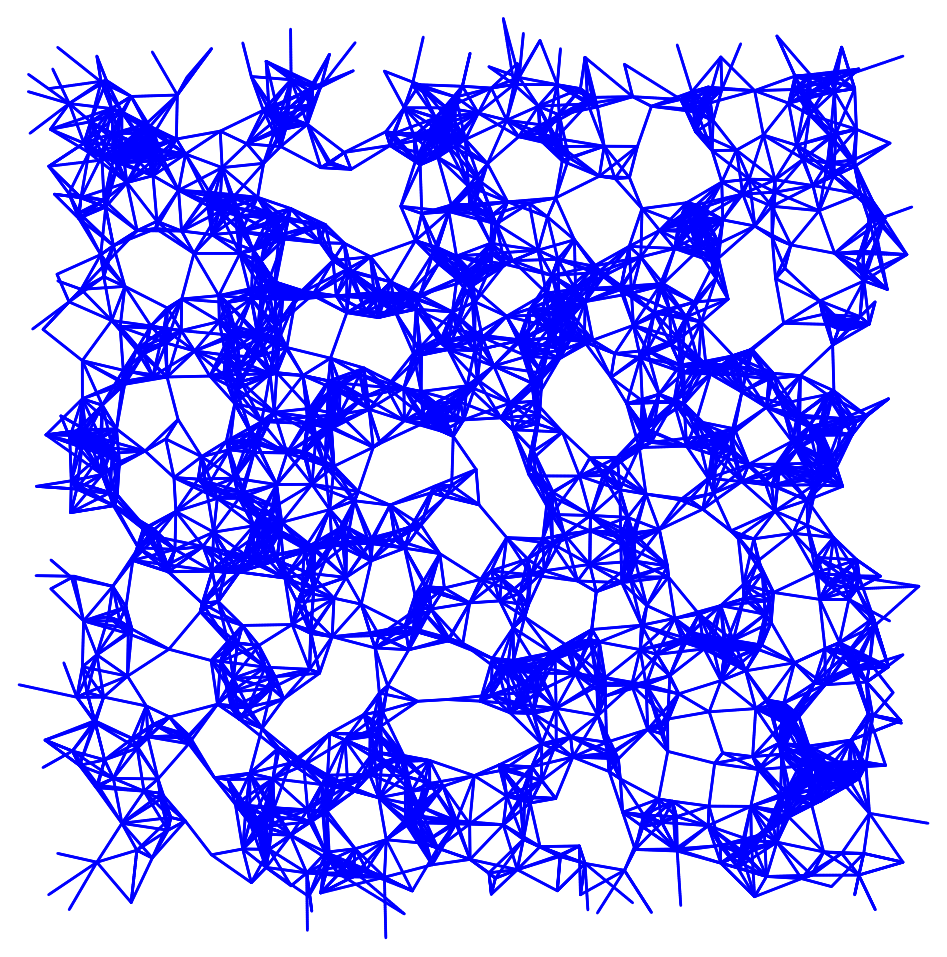

In [42]:
fig, ax = g.plot_graph(return_figax=True, figsize=10, linewidth=2)
plt.savefig(f"../figures/rgg/torus_graph.png", dpi=300, bbox_inches="tight")

In [38]:
for which in range(4):
    print(which)
    fig, ax = g.plot_graph(return_figax=True, figsize=10, eigenmode=proj.data[0, 1]['graph']['eigenfunction'][which].data, 
                        linewidth=2, background_color="black")
    
    plt.savefig(f"../figures/rgg/torus_graph_mode_{which}.png", dpi=300, bbox_inches="tight")

    plt.close()

0


In [36]:
for which in range(4):
    print(which)

    # Input data
    points = np.hstack((g.g_coords))
    values = np.hstack((proj.data[0, 1]['PDE']['eigenfunction'][which].data))

    # Create a regular grid over the unit disc
    xi = np.linspace(0, 1, 128)
    yi = np.linspace(0, 1, 128)
    grid_x, grid_y = np.meshgrid(xi, yi)

    # Interpolate the scalar field onto the grid
    grid_u = np.full(grid_x.shape, np.nan)  # Initialize with NaNs
    grid_u = scipy.interpolate.griddata(points.T, values, (grid_x, grid_y), method='cubic')

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.scatter(grid_x, grid_y, marker='s', c=grid_u, cmap="plasma")

    fig.set_facecolor("black")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    ax.axis('off')

    plt.savefig(f"../figures/rgg/torus_PDE_mode_{which}.png", dpi=300, bbox_inches="tight")

    plt.close()

0
1
2
3


In [143]:
num_Vs = nums_Vs[-3]
seed = 6

np.random.seed(seed)
rd = construct_graph.patch_graph.RGG(num_Vs)
g = construct_graph.patch_graph.Patch(rd)

eigs = solve_laplace_operator.solve_laplace_operator.Eigenvalue_Calculator(g)

guesses = eigenvalues_data[num_Vs][seed - 1].copy()

full_solutions = eigs(guesses, solve_type="SVD iterate")
print(full_solutions)


Calculating eig number 0

----------------------
Converged at step 5:

k = 3.554234411251921
----------------------

Calculating eig number 1

----------------------
Converged at step 6:

k = 3.554234411251924
----------------------

Calculating eig number 2

----------------------
Converged at step 4:

k = 3.756210568002632
----------------------

Calculating eig number 3

----------------------
Converged at step 4:

k = 3.7562105680026314
----------------------
[3.55423441 3.55423441 3.75621057 3.75621057]


In [159]:
np.mean(list(eigenvalues_data[nums_Vs[-1]].values()))

3.6557456588558472

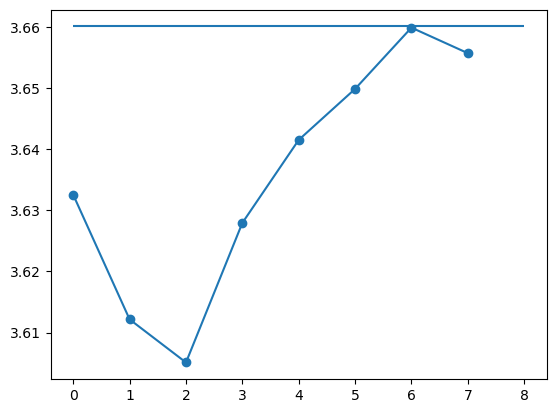

In [176]:
plt.plot(means, 'o-')
plt.hlines(calculate_pde_eigenvalue(1, 0), 0, 8)

In [193]:
np.mean(list(eigenvalues_data[nums_Vs[-2]].values())[:], axis=1)

array([3.65028729, 3.66263264, 3.63271296, 3.66462044, 3.65653005,
       3.64685663, 3.66576459, 3.64666936, 3.68163761, 3.65372222,
       3.62834533, 3.66756635, 3.68951867, 3.67339741, 3.67278012,
       3.65970432, 3.65403278, 3.6719308 ])

In [194]:
np.argsort(np.mean(list(eigenvalues_data[nums_Vs[-2]].values())[:], axis=1))

array([10,  2,  7,  5,  0,  9, 16,  4, 15,  1,  3,  6, 11, 17, 14, 13,  8,
       12])

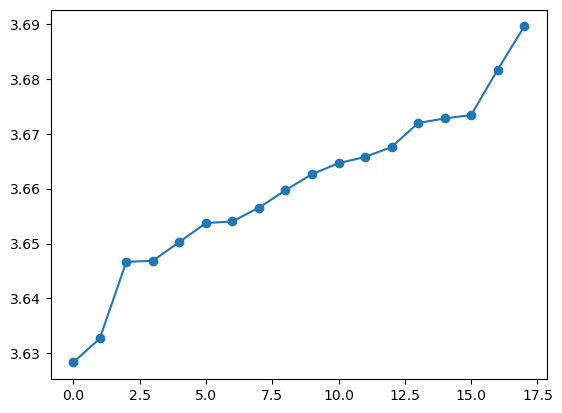

In [197]:
plt.plot(np.sort(np.mean(list(eigenvalues_data[nums_Vs[-2]].values())[:], axis=1)), 'o-')

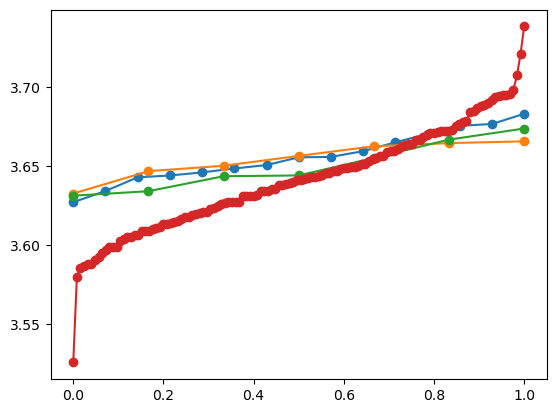

In [205]:
plt.plot(np.linspace(0, 1, len(list(eigenvalues_data[nums_Vs[-1]].values()))), np.sort(np.mean(list(eigenvalues_data[nums_Vs[-1]].values())[:], axis=1)), 'o-')
plt.plot(np.linspace(0, 1, len(list(eigenvalues_data[nums_Vs[-2]].values())[:7])), np.sort(np.mean(list(eigenvalues_data[nums_Vs[-2]].values())[:7], axis=1)), 'o-')
plt.plot(np.linspace(0, 1, len(list(eigenvalues_data[nums_Vs[-3]].values()))), np.sort(np.mean(list(eigenvalues_data[nums_Vs[-3]].values())[:], axis=1)), 'o-')
plt.plot(np.linspace(0, 1, len(list(eigenvalues_data[nums_Vs[-4]].values()))), np.sort(np.mean(list(eigenvalues_data[nums_Vs[-4]].values())[:], axis=1)), 'o-')

In [185]:
np.mean(list(eigenvalues_data[nums_Vs[-2]].values())[:7])

3.654200656584524

In [190]:
np.mean(list(eigenvalues_data[nums_Vs[-2]].values())[9:])

3.6634442212253884

In [181]:
np.mean(list(eigenvalues_data[nums_Vs[-1]].values())[:])

3.6557456588558472

In [144]:
eigenvalues_data[num_Vs][seed] = full_solutions.copy()

In [ ]:
# file = open("../data/rgg/torus_eigenvalues/rgg_eigenvalues.pkl", "rb")
# eigenvalues_data = pickle.load(file)
# file.close()

In [232]:
nums_Vs = np.array(list(eigenvalues_data.keys()))

means = []
for num_Vs in eigenvalues_data:
    if num_Vs == 15848:
        means.append(np.mean(list(eigenvalues_data[num_Vs].values())[:11]))
    else:
        means.append(np.mean(list(eigenvalues_data[num_Vs].values())))
means = np.array(means)

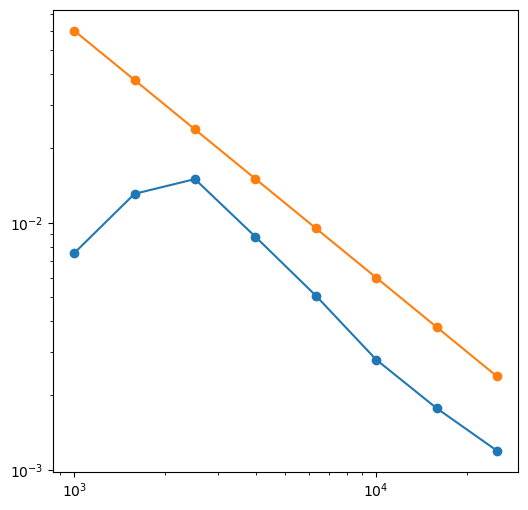

In [233]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.loglog(nums_Vs, np.abs((means - calculate_pde_eigenvalue(1, 0)) / calculate_pde_eigenvalue(1, 0)), 'o-')

ax.loglog(nums_Vs, nums_Vs**(-1.) * 60, 'o-')

In [ ]:
x = nums_Vs.copy()
y = np.abs((means - calculate_pde_eigenvalue(1, 0)) / calculate_pde_eigenvalue(1, 0)).copy()
vars = np.var()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 4.5
eigenvalue_markersize = 15

ax.errorbar(x, y, yerr=[cauchy_coefficients_vars, cauchy_coefficients_vars], fmt='o-', 
            c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize, elinewidth=2, ecolor='black')

ax.set_xscale('log')
ax.set_yscale('log')

ax.loglog(x, x**(-0.5) * 1, '--', c='b', linewidth=eigenvalue_linewidth)

style_plot(fig, ax, aspect=None)

ax.set_ylim(9.5e-5, 6e-2)

plt.savefig("../figures/rgg/coefficient_cauchy_convergence_plot.png", dpi=300, bbox_inches="tight")

plt.show()


3.660117533237096

In [74]:
2 * np.pi

6.283185307179586